In [1]:
from PIL import Image
import numpy as np
import pandas as pd
import posixpath
import matplotlib.pyplot as plt
import imtools
import argparse 
import cv2
from sklearn.cluster import KMeans
import scipy.cluster.hierarchy as hcluster
import scipy as sp
from skimage import filters 
from skimage import measure 
import collections 
import diameter 
from scipy.spatial import distance
%matplotlib inline 

/Users/Macbook/anaconda/lib/python2.7/site-packages/pandas/computation/__init__.py:19: UserWarning: The installed version of numexpr 2.4.4 is not supported in pandas and will be not be used

  UserWarning)


In [2]:
parsed_coord = open(posixpath.abspath('parsed_data/params_res.txt'))
parsed_coord = parsed_coord.readlines()

res = []
for line in parsed_coord:
    res.append(line.split())
df = pd.DataFrame(res[1:], columns=res[0])

image_names_full = imtools.get_imlist(posixpath.abspath('parsed_data/imgs'))
image_names = [posixpath.basename(x) for x in image_names_full]

In [3]:
def draw_dots_results(image_full_path):
    """Draw pictures and mapped values of pupil centers"""

    image = cv2.imread(image_full_path)
    image_arr = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    plt.figure(1)
    plt.gray()
    plt.imshow(image_arr, interpolation='none', aspect='auto')
    plt.plot(int(df[df['Filename'] == posixpath.basename(image_full_path)].CenX), 
             int(df[df['Filename'] == posixpath.basename(image_full_path)].CenY), 'r*')
    plt.axis('equal')
    plt.axis('off')

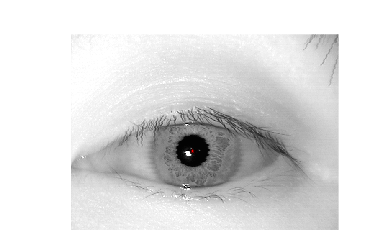

In [24]:
draw_dots_results(image_names_full[50])

In [5]:
def binary_image(image, erode_it=6, dilate_it=4, threshold=60):
    image_arr = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    image_arr = cv2.erode(image_arr, None, iterations=erode_it)
    image_arr = cv2.dilate(image_arr, None, iterations=dilate_it)
    kernel = np.ones((5,5),np.uint8)
    for i in range(1):
        image_arr = cv2.morphologyEx(image_arr ,cv2.MORPH_CLOSE, kernel)
    _, image_arr = cv2.threshold(image_arr, threshold, 255, cv2.THRESH_BINARY)
    return image_arr

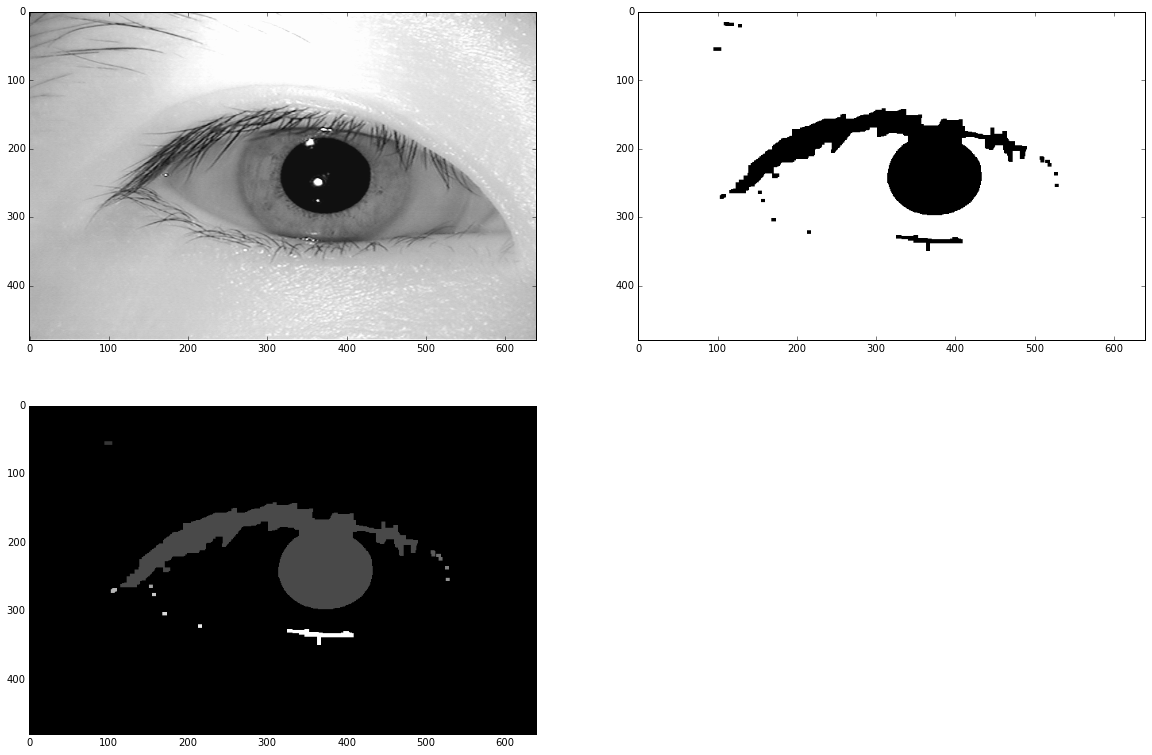

In [11]:
plt.figure(1, figsize=(20,20))
plt.subplot(321)
plt.imshow(cv2.imread(image_names_full[100]), aspect="auto")
plt.subplot(322)
plt.imshow(binary_image(cv2.imread(image_names_full[100])), aspect="auto")
plt.subplot(323)
plt.imshow(find_connected_components(image_names_full[100]), aspect="auto")

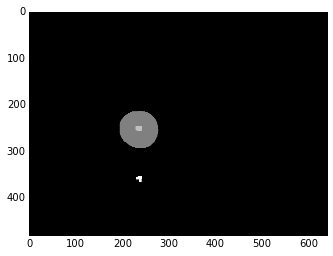

In [25]:
plt.imshow(find_connected_components(image_names_full[501]))

# Вот здесь начинается функция


In [9]:
def find_connected_components(image_names_full):  
    """Get binary image and find suitable connected components"""
    
    data = binary_image(cv2.imread(image_names_full))
    blobs = [data == 255]
    im = measure.label(np.array(blobs))[0]
    
    r_small = np.sum(im.shape)*0.01/2
    
    res = []
    for i in np.delete(np.unique(im), 0):
        res.append((i, np.sum(im[im == i])))
    res = np.array(res)
    
    """Можно попробовать еще вот это
    res = []
    for i in np.delete(np.unique(im), 0):
        dots_arr = np.where(im == i)
        dots_arr = np.dstack(dots_arr)[0]      
        farest_dots = (diameter.diameter(dots_arr) if 
                       diameter.diameter(dots_arr)!= None else (0,0)) 
        res.append((i, distance.euclidean(*farest_dots)))     
    res = np.array(res) # sets diameters
    """
    
    pased_sets = res[res[:,1] >= np.pi * r_small**2][:,0]
    suit_dots = np.in1d(im, pased_sets).reshape(im.shape)
    return im*suit_dots

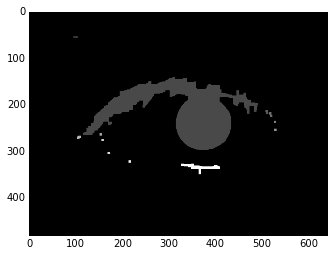

In [10]:
plt.imshow(find_connected_components(image_names_full[100]))

# Посчитать для каждой компоненты связности эффективный радиус и после посчитать качество, эффективные радиусы уже по сути посчитаны в определении функции выше 


